# Introduction
Saham merupakan salah satu instrumen investasi populer yang dipengaruhi oleh berbagai faktor internal maupun eksternal. Dalam proyek ini, saya akan membangun sistem prediksi arah tren harga saham harian (uptrend, downtrend, sideways) dengan menggunakan data historis saham BBRI (Bank Rakyat Indonesia) selama 7 tahun terakhir.

Tujuan dari proyek ini adalah untuk membantu investor memahami arah pergerakan harga dalam jangka pendek, sehingga dapat menjadi bahan pertimbangan dalam pengambilan keputusan investasi.

Metode yang digunakan dalam proyek ini adalah pendekatan klasifikasi berbasis machine learning. Selain itu, dilakukan juga eksperimen awal dengan model LSTM untuk memprediksi harga saham sebagai pendekatan regresi berbasis time series.
*   **Tujuan Proyek**: Proyek ini bertujuan untuk membangun sistem prediksi arah tren harga saham harian (uptrend, downtrend, atau sideways) menggunakan algoritma machine learning. Prediksi ini diharapkan dapat membantu investor atau analis pasar dalam membuat keputusan yang lebih tepat berdasarkan pola historis pergerakan harga.

*   **Data Understanding**:
Data yang digunakan adalah harga saham harian PT Bank Rakyat Indonesia Tbk (BBRI) selama 5 tahun terakhir. Dataset mencakup informasi harga pembukaan (Open), penutupan (Close), harga tertinggi (High), harga terendah (Low), dan volume transaksi harian selama 7 tahun dari 2018-2025
Dataset terdiri dari **1.730 entri harian** tanpa missing values, dan mencakup 6 kolom utama: `Date`, `Close`, `High`, `Low`, `Open`, dan `Volume`.

In [54]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Plot settings
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Load Data

ticker = 'BBRI.JK'
start_date = '2018-01-01'
end_date = '2024-12-31'
bbri_df = yf.download(ticker, start=start_date, end=end_date)
bbri_df.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [56]:
bbri_df.to_csv('/content/drive/MyDrive/bbri_data.csv', index=False)

#EDA

In [57]:
print("📌 Data Teratas:")
display(bbri_df.head())

📌 Data Teratas:


Price,Date,Close,High,Low,Open,Volume
Ticker,,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
0,2018-01-01,2289.992920,2289.992920,2289.992920,2289.992920,0
1,2018-01-02,2283.701660,2340.322279,2271.119188,2321.448739,100241541
2,2018-01-03,2271.119385,2283.701858,2239.663370,2283.701858,77164902
3,2018-01-04,2233.372070,2271.119149,2176.751284,2271.119149,172049901
4,2018-01-05,2258.536865,2258.536865,2214.498550,2233.372090,95806814


In [58]:
# Struktur dan info data
print("\n📌 Info Data:")
bbri_df.info()


📌 Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           1730 non-null   datetime64[ns]
 1   (Close, BBRI.JK)   1730 non-null   float64       
 2   (High, BBRI.JK)    1730 non-null   float64       
 3   (Low, BBRI.JK)     1730 non-null   float64       
 4   (Open, BBRI.JK)    1730 non-null   float64       
 5   (Volume, BBRI.JK)  1730 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 81.2 KB


In [59]:
# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
display(bbri_df.describe())



📌 Statistik Deskriptif:


Price,Date,Close,High,Low,Open,Volume
Ticker,,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
count,1730,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03
mean,2021-06-10 02:18:10.404624128,3271.413093,3309.313665,3236.922617,3274.556378,1.638058e+08
min,2018-01-01 00:00:00,1513.757080,1583.515525,1506.781189,1569.563742,0.000000e+00
25%,2019-08-28 06:00:00,2467.156372,2509.089281,2449.074275,2476.422933,9.771245e+07
50%,2021-06-08 12:00:00,3068.266113,3105.960273,3031.236110,3072.174512,1.360634e+08
75%,2023-03-02 18:00:00,3970.980713,4006.063043,3933.544521,3962.707739,1.959769e+08
max,2024-12-30 00:00:00,5763.100098,5785.969664,5694.491883,5763.100219,9.598846e+08
std,NaN,944.550539,950.720635,939.363227,943.496158,1.083574e+08


In [60]:
# Cek missing values
print("\n📌 Missing Value per Kolom:")
print(bbri_df.isnull().sum())


📌 Missing Value per Kolom:
Price   Ticker 
Date               0
Close   BBRI.JK    0
High    BBRI.JK    0
Low     BBRI.JK    0
Open    BBRI.JK    0
Volume  BBRI.JK    0
dtype: int64


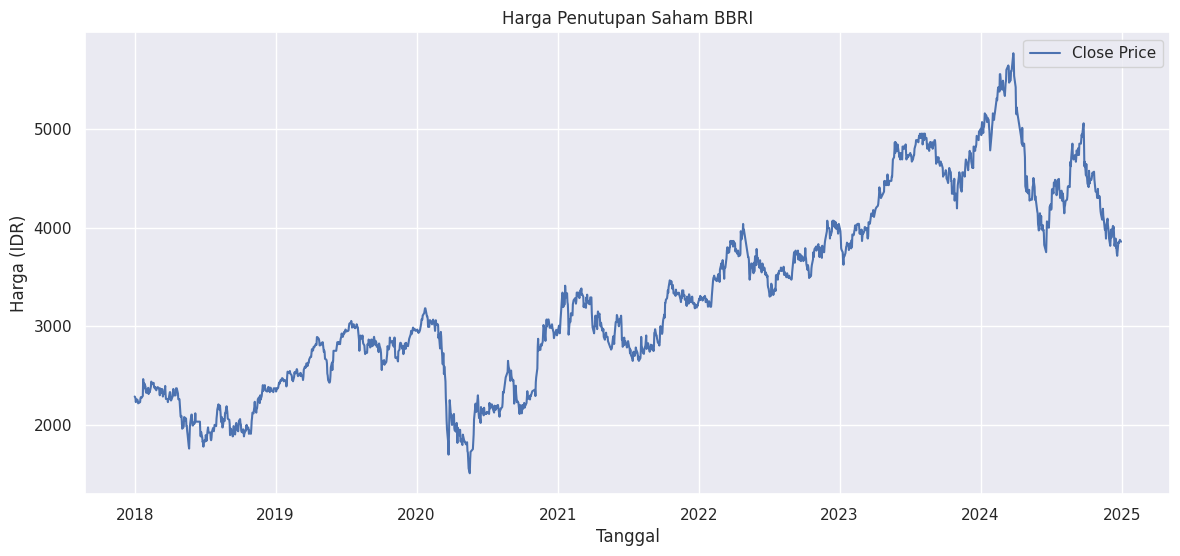

In [61]:
# Plot harga penutupan (Close)
plt.figure(figsize=(14,6))
plt.plot(bbri_df['Date'], bbri_df['Close'], label='Close Price')
plt.title('Harga Penutupan Saham BBRI')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.grid(True)
plt.legend()
plt.show()

Insight:
- Pada awal 2020 terjadi penurunan tajam yang kemungkinan besar disebabkan oleh dampak awal pandemi COVID-19.
- Setelah itu, harga mengalami pemulihan dan tren naik yang konsisten selama tahun 2021–2023.
- Puncak harga terjadi pada awal tahun 2024 sebelum kembali mengalami koreksi cukup tajam hingga pertengahan 2025.
- Pola pergerakan ini memperlihatkan dinamika tren harga yang dapat dikategorikan menjadi **uptrend**, **downtrend**, dan **sideways**, yang menjadi target dari sistem klasifikasi tren harga saham dalam proyek ini.

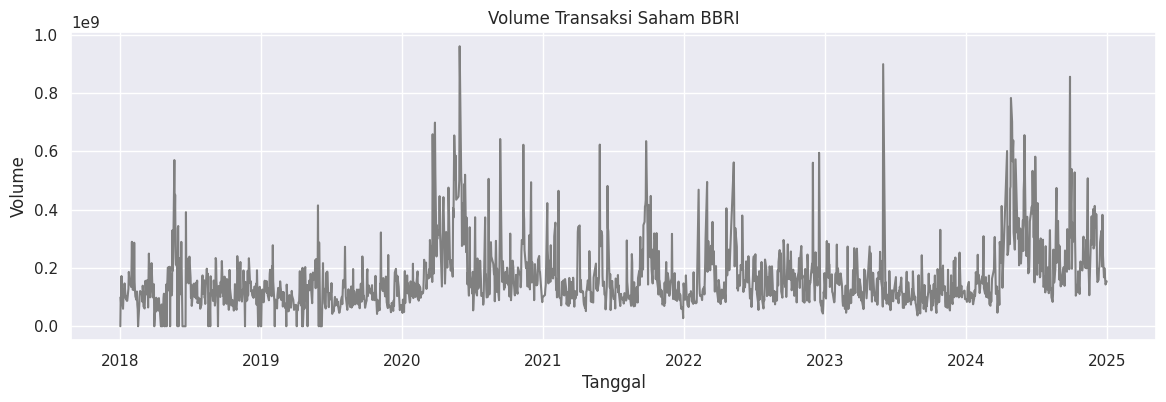

In [62]:
# Plot volume transaksi
plt.figure(figsize=(14,4))
plt.plot(bbri_df['Date'], bbri_df['Volume'], color='gray')
plt.title('Volume Transaksi Saham BBRI')
plt.xlabel('Tanggal')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

Insight:
- Volume transaksi cenderung meningkat secara drastis pada awal tahun 2020, yang kemungkinan berhubungan dengan ketidakpastian pasar global akibat pandemi COVID-19.
- Terdapat lonjakan volume yang signifikan di beberapa titik waktu lain, terutama pada pertengahan 2020, awal 2023, dan awal 2024, yang mungkin bertepatan dengan aksi korporasi, rilis laporan keuangan, atau sentimen pasar tertentu.
- Meski terdapat fluktuasi, secara umum volume berada dalam kisaran stabil setelah tahun 2021, dengan pola-pola lonjakan yang bisa dijadikan sinyal untuk mendeteksi potensi perubahan tren harga saham.

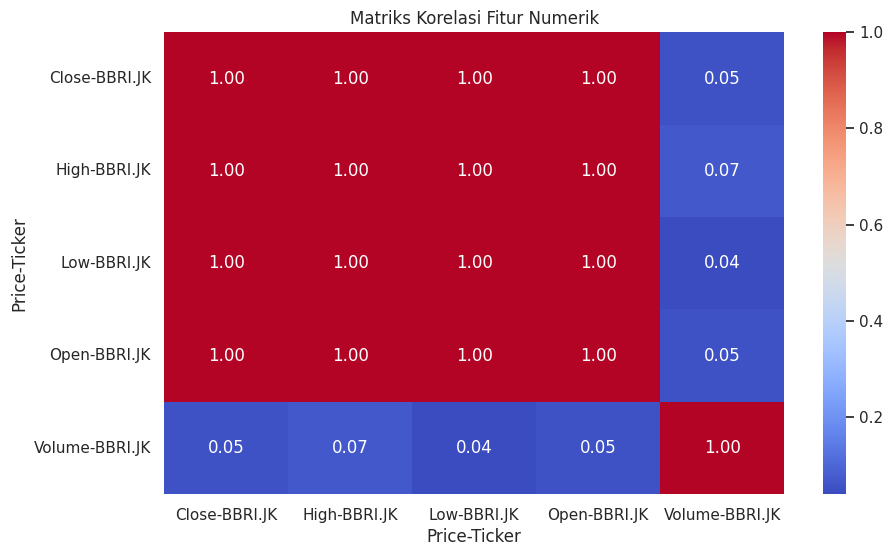

In [63]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(bbri_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

📌 Insight:
- Terdapat korelasi **sempurna (1.00)** antara fitur harga seperti `Open`, `High`, `Low`, dan `Close`. Hal ini **masuk akal**, karena harga-harga tersebut berasal dari rentang waktu yang sama dalam satu hari perdagangan, sehingga mereka sangat terkait satu sama lain.
- **Volume** memiliki korelasi yang **sangat lemah (hampir nol)** terhadap semua fitur harga. Artinya, **volume transaksi tidak memiliki hubungan linier langsung dengan pergerakan harga harian**.
- Meskipun volume tidak berkorelasi secara linier, volume tetap bisa memiliki **pengaruh tidak langsung atau non-linier** terhadap tren atau volatilitas harga yang dapat ditangkap oleh model klasifikasi berbasis machine learning.

📌 Implikasi terhadap modeling:
- Karena `Open`, `High`, `Low`, dan `Close` sangat berkorelasi, kita bisa melakukan **reduksi dimensi atau memilih salah satu (misalnya Close) sebagai fitur utama harga**, atau mengubahnya menjadi **fitur turunan** seperti:
  - **Average Price** = (Open + High + Low + Close)/4
  - **High-Low Range** = High - Low
  - **Daily Return** = Close - Open
- Volume tetap dipertahankan karena bisa menangkap dinamika pasar yang tidak langsung tercermin dari harga.


# Data Preprocessing

In [64]:
# Set kolom Date sebagai index
bbri_df['Date'] = pd.to_datetime(bbri_df['Date'])
bbri_df.set_index('Date', inplace=True)
bbri_df = bbri_df.sort_index()

# Fokus hanya pada kolom Close (harga penutupan)
df_close = bbri_df[['Close']].copy()

In [65]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_close['Normalized_Close'] = scaler.fit_transform(df_close[['Close']])

In [66]:
# Buat Windowing (Sequence) untuk LSTM

def create_sequences(data, window_size=30):
    sequences, targets = [], []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size]
        target = data[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

normalized_values = df_close['Normalized_Close'].values
WINDOW_SIZE = 30
X, y = create_sequences(normalized_values, window_size=WINDOW_SIZE)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [67]:
# Train-Test Split (berbasis waktu, bukan acak)
SPLIT_RATIO = 0.8
split_index = int(len(X) * SPLIT_RATIO)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (1360, 30, 1)
X_test shape : (340, 30, 1)
y_train shape: (1360,)
y_test shape : (340,)


# Modelling LSTM (Prediksi)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [69]:
# Buat model LSTM sederhana
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callback: EarlyStopping + ModelCheckpoint
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_lstm.h5', save_best_only=True)

In [70]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0581 - mae: 0.1777

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0557 - mae: 0.1722 - val_loss: 0.0017 - val_mae: 0.0330
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0031 - val_mae: 0.0424
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.0275e-04 - mae: 0.0195 - val_loss: 0.0028 - val_mae: 0.0401
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.2061e-04 - mae: 0.0194 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.2486e-04 - mae: 0.0185 - val_loss: 0.0018 - val_mae: 0.0320
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.7590e-04 - mae: 0.0191 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.0062e-04 - mae: 0.0193 - val_loss: 0.0020 - val_mae: 0.0338
Epoch 8/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.7305e-04 - mae: 0.0176

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.7489e-04 - mae: 0.0177 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 9/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.1976e-04 - mae: 0.0180

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 6.2021e-04 - mae: 0.0180 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.9642e-04 - mae: 0.0177 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 11/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.6943e-04 - mae: 0.0179

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.6984e-04 - mae: 0.0179 - val_loss: 0.0011 - val_mae: 0.0259
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.0776e-04 - mae: 0.0162 - val_loss: 0.0012 - val_mae: 0.0267
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.9110e-04 - mae: 0.0161 - val_loss: 0.0012 - val_mae: 0.0268
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.5145e-04 - mae: 0.0169

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.5076e-04 - mae: 0.0169 - val_loss: 9.4788e-04 - val_mae: 0.0236
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.3483e-04 - mae: 0.0171

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.3447e-04 - mae: 0.0171 - val_loss: 9.0646e-04 - val_mae: 0.0232
Epoch 16/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.0049e-04 - mae: 0.0159 - val_loss: 0.0010 - val_mae: 0.0248
Epoch 17/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7638e-04 - mae: 0.0155

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.7789e-04 - mae: 0.0155 - val_loss: 8.6130e-04 - val_mae: 0.0227
Epoch 18/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5343e-04 - mae: 0.0156

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5462e-04 - mae: 0.0156 - val_loss: 8.4159e-04 - val_mae: 0.0226
Epoch 19/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7198e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 20/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5314e-04 - mae: 0.0157

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5327e-04 - mae: 0.0157 - val_loss: 7.8001e-04 - val_mae: 0.0218
Epoch 21/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0751e-04 - mae: 0.0149 - val_loss: 8.0483e-04 - val_mae: 0.0220
Epoch 22/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1664e-04 - mae: 0.0148

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.1845e-04 - mae: 0.0148 - val_loss: 7.4153e-04 - val_mae: 0.0215
Epoch 23/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3705e-04 - mae: 0.0150

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.3666e-04 - mae: 0.0150 - val_loss: 7.1482e-04 - val_mae: 0.0209
Epoch 24/100
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.1608e-04 - mae: 0.0147

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1539e-04 - mae: 0.0147 - val_loss: 7.0135e-04 - val_mae: 0.0206
Epoch 25/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.0635e-04 - mae: 0.0146

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0590e-04 - mae: 0.0146 - val_loss: 6.7532e-04 - val_mae: 0.0204
Epoch 26/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3905e-04 - mae: 0.0148

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3755e-04 - mae: 0.0148 - val_loss: 6.7469e-04 - val_mae: 0.0202
Epoch 27/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0535e-04 - mae: 0.0142 - val_loss: 8.4823e-04 - val_mae: 0.0237
Epoch 28/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.2170e-04 - mae: 0.0155 - val_loss: 7.4455e-04 - val_mae: 0.0221
Epoch 29/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0747e-04 - mae: 0.0147

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0661e-04 - mae: 0.0147 - val_loss: 6.2588e-04 - val_mae: 0.0198
Epoch 30/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5635e-04 - mae: 0.0139 - val_loss: 6.2718e-04 - val_mae: 0.0193
Epoch 31/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5016e-04 - mae: 0.0136 - val_loss: 9.9976e-04 - val_mae: 0.0245
Epoch 32/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.6480e-04 - mae: 0.0141 - val_loss: 7.2238e-04 - val_mae: 0.0204
Epoch 33/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4808e-04 - mae: 0.0136

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.4735e-04 - mae: 0.0135 - val_loss: 5.7738e-04 - val_mae: 0.0186
Epoch 34/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5613e-04 - mae: 0.0136 - val_loss: 5.9791e-04 - val_mae: 0.0187
Epoch 35/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1229e-04 - mae: 0.0126 - val_loss: 5.9719e-04 - val_mae: 0.0187
Epoch 36/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.1323e-04 - mae: 0.0133

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1425e-04 - mae: 0.0133 - val_loss: 5.5091e-04 - val_mae: 0.0183
Epoch 37/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9783e-04 - mae: 0.0127

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9850e-04 - mae: 0.0127 - val_loss: 5.3827e-04 - val_mae: 0.0181
Epoch 38/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2830e-04 - mae: 0.0134 - val_loss: 5.4001e-04 - val_mae: 0.0180
Epoch 39/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.8585e-04 - mae: 0.0122

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.8611e-04 - mae: 0.0122 - val_loss: 5.2768e-04 - val_mae: 0.0179
Epoch 40/100
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1975e-04 - mae: 0.0131

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1667e-04 - mae: 0.0130 - val_loss: 5.2007e-04 - val_mae: 0.0178
Epoch 41/100
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0431e-04 - mae: 0.0130

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0397e-04 - mae: 0.0130 - val_loss: 5.1008e-04 - val_mae: 0.0176
Epoch 42/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7560e-04 - mae: 0.0120 - val_loss: 5.1460e-04 - val_mae: 0.0176
Epoch 43/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6858e-04 - mae: 0.0119 - val_loss: 5.6005e-04 - val_mae: 0.0183
Epoch 44/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9152e-04 - mae: 0.0126

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9158e-04 - mae: 0.0126 - val_loss: 4.9952e-04 - val_mae: 0.0174
Epoch 45/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8603e-04 - mae: 0.0124 - val_loss: 5.9450e-04 - val_mae: 0.0189
Epoch 46/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7671e-04 - mae: 0.0123 - val_loss: 5.7143e-04 - val_mae: 0.0186
Epoch 47/100
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7725e-04 - mae: 0.0122

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7767e-04 - mae: 0.0122 - val_loss: 4.8512e-04 - val_mae: 0.0171
Epoch 48/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7216e-04 - mae: 0.0117 - val_loss: 5.3572e-04 - val_mae: 0.0180
Epoch 49/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8666e-04 - mae: 0.0127

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.8619e-04 - mae: 0.0127 - val_loss: 4.8414e-04 - val_mae: 0.0170
Epoch 50/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7357e-04 - mae: 0.0119 - val_loss: 5.1464e-04 - val_mae: 0.0176
Epoch 51/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5076e-04 - mae: 0.0122

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.5172e-04 - mae: 0.0122 - val_loss: 4.6488e-04 - val_mae: 0.0167
Epoch 52/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6939e-04 - mae: 0.0122 - val_loss: 4.6657e-04 - val_mae: 0.0166
Epoch 53/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7103e-04 - mae: 0.0122 - val_loss: 5.1616e-04 - val_mae: 0.0175
Epoch 54/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4014e-04 - mae: 0.0113

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4054e-04 - mae: 0.0113 - val_loss: 4.6316e-04 - val_mae: 0.0165
Epoch 55/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3667e-04 - mae: 0.0113

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3658e-04 - mae: 0.0113 - val_loss: 4.4120e-04 - val_mae: 0.0162
Epoch 56/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7916e-04 - mae: 0.0124 - val_loss: 5.1319e-04 - val_mae: 0.0179
Epoch 57/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7596e-04 - mae: 0.0123 - val_loss: 4.5981e-04 - val_mae: 0.0165
Epoch 58/100
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2952e-04 - mae: 0.0111

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2954e-04 - mae: 0.0111 - val_loss: 4.4085e-04 - val_mae: 0.0162
Epoch 59/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3316e-04 - mae: 0.0113

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3306e-04 - mae: 0.0113 - val_loss: 4.3433e-04 - val_mae: 0.0161
Epoch 60/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2228e-04 - mae: 0.0109

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2253e-04 - mae: 0.0109 - val_loss: 4.3001e-04 - val_mae: 0.0161
Epoch 61/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2678e-04 - mae: 0.0109 - val_loss: 4.7723e-04 - val_mae: 0.0169
Epoch 62/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.1514e-04 - mae: 0.0108 - val_loss: 4.6582e-04 - val_mae: 0.0168
Epoch 63/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5573e-04 - mae: 0.0120

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.5520e-04 - mae: 0.0120 - val_loss: 4.2213e-04 - val_mae: 0.0159
Epoch 64/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.2034e-04 - mae: 0.0110 - val_loss: 4.3172e-04 - val_mae: 0.0160
Epoch 65/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1321e-04 - mae: 0.0108 - val_loss: 7.3432e-04 - val_mae: 0.0217
Epoch 66/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4720e-04 - mae: 0.0116 - val_loss: 4.9605e-04 - val_mae: 0.0173
Epoch 67/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1797e-04 - mae: 0.0107

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1765e-04 - mae: 0.0107 - val_loss: 4.0834e-04 - val_mae: 0.0156
Epoch 68/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0327e-04 - mae: 0.0106 - val_loss: 4.3729e-04 - val_mae: 0.0162
Epoch 69/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1101e-04 - mae: 0.0105 - val_loss: 5.5793e-04 - val_mae: 0.0185
Epoch 70/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3483e-04 - mae: 0.0114 - val_loss: 4.4124e-04 - val_mae: 0.0163
Epoch 71/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2854e-04 - mae: 0.0112 - val_loss: 4.4642e-04 - val_mae: 0.0163
Epoch 72/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1357e-04 - mae: 0.0107

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1360e-04 - mae: 0.0107 - val_loss: 3.9264e-04 - val_mae: 0.0154
Epoch 73/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3875e-04 - mae: 0.0111 - val_loss: 3.9594e-04 - val_mae: 0.0153
Epoch 74/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.9978e-04 - mae: 0.0105 - val_loss: 5.3436e-04 - val_mae: 0.0180
Epoch 75/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.9850e-04 - mae: 0.0108 - val_loss: 4.5335e-04 - val_mae: 0.0165
Epoch 76/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4741e-04 - mae: 0.0115 - val_loss: 4.2440e-04 - val_mae: 0.0160
Epoch 77/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1993e-04 - mae: 0.0108 - val_loss: 4.9115e-04 - val_mae: 0.0172
Epoch 78/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2526e-04 - mae: 0.0109 - val_loss: 3.9314e-04 - val_mae: 0.0153
Epoch 79/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1397e-04 - mae: 0.0109 - val_loss: 4.0268e-04 - val_mae: 0.01

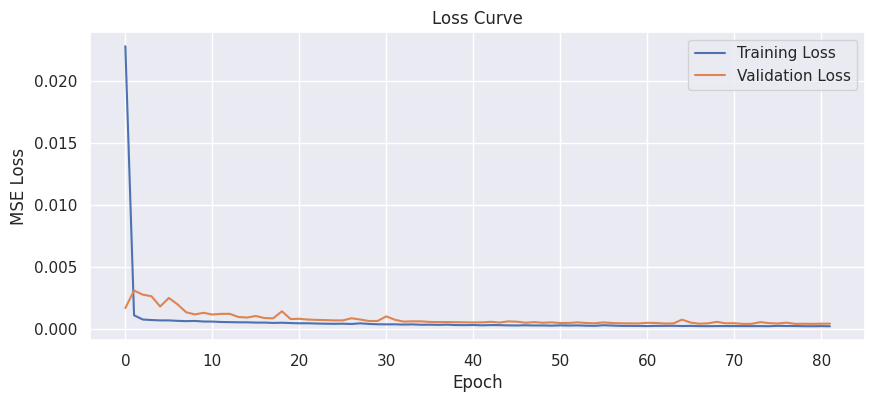

In [71]:
# Visualisasi loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi di data test
y_pred = model.predict(X_test)

# Kembalikan ke skala asli (dari Normalized → Harga Asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Evaluasi metrik
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"📈 Evaluation: LSTM Regression Model")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
📈 Evaluation: LSTM Regression Model
MAE : 65.29
MSE : 7089.85
RMSE: 84.20
R²  : 0.9635


In [73]:
# Buat DataFrame prediksi vs aktual
test_dates = df_close.index[WINDOW_SIZE + len(y_train):]  # offset: window + train
result_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test_inv.flatten(),
    'Predicted_Close': y_pred_inv.flatten()
})
result_df.set_index('Date', inplace=True)

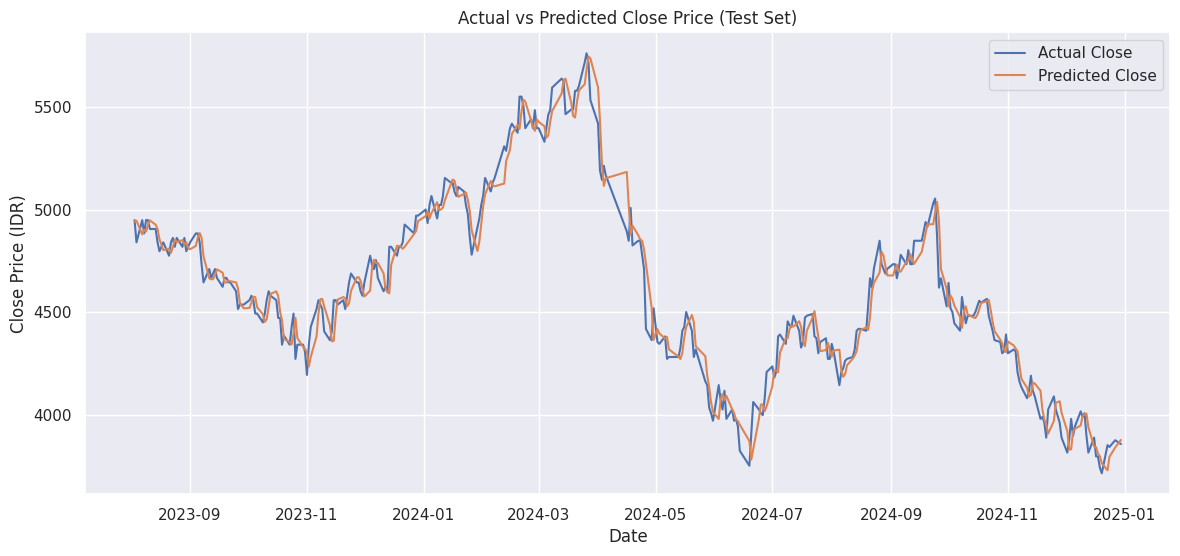

In [74]:
# Buat DataFrame prediksi vs aktual
test_dates = df_close.index[WINDOW_SIZE + len(y_train):]  # offset: window + train
result_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test_inv.flatten(),
    'Predicted_Close': y_pred_inv.flatten()
})
result_df.set_index('Date', inplace=True)

# Plot hasil prediksi
plt.figure(figsize=(14, 6))
plt.plot(result_df['Actual_Close'], label='Actual Close')
plt.plot(result_df['Predicted_Close'], label='Predicted Close')
plt.title('Actual vs Predicted Close Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price (IDR)')
plt.legend()
plt.grid(True)
plt.show()

Insight:
- Secara umum, prediksi model mampu mengikuti tren pergerakan harga dengan baik, terutama pada **fase uptrend dan downtrend yang jelas**.
- Terdapat beberapa deviasi antara prediksi dan aktual di area puncak atau lembah tajam, yang bisa disebabkan oleh **volatilitas ekstrem** atau **informasi eksternal** yang tidak tersedia dalam fitur dataset.
- Model menunjukkan performa cukup stabil dalam mengikuti pola naik-turun harian, yang berarti cukup mampu menangkap **temporal pattern** harga saham.

In [75]:
# Simpan model LSTM
model.save('/content/drive/MyDrive/bbri_lstm_model.keras')

# Simpan scaler
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/bbri_scaler.save')


['/content/drive/MyDrive/bbri_scaler.save']